<h1> Python for Data Science </h1>

<h4> 1. Reading the .csv file as dataframe  </h4>

In [98]:
import pandas as pd

df=pd.read_csv('gapminder_clean.csv')

print(df.head)

<bound method NDFrame.head of       Unnamed: 0 Country Name  Year  Agriculture, value added (% of GDP)   
0              0  Afghanistan  1962                                  NaN  \
1              1  Afghanistan  1967                                  NaN   
2              2  Afghanistan  1972                                  NaN   
3              3  Afghanistan  1977                                  NaN   
4              4  Afghanistan  1982                                  NaN   
...          ...          ...   ...                                  ...   
2602        2602     Zimbabwe  1987                            14.407528   
2603        2603     Zimbabwe  1992                             7.413793   
2604        2604     Zimbabwe  1997                            18.934082   
2605        2605     Zimbabwe  2002                            14.029007   
2606        2606     Zimbabwe  2007                            21.597907   

      CO2 emissions (metric tons per capita)   
0        

In [163]:
#Creates a template for Bokeh plots with common settings.
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
def create_plot_template():

    # Create a figure with common settings
    p = figure(width=800, height=600)
    
    # Set default colors and color palette
    p.background_fill_color = "white"
    p.border_fill_color = "white"
    p.grid.visible = False
    p.outline_line_color = None
    p.title.text_font_size= "14pt"
    p.xaxis.axis_label_text_font_size = "12pt"
    p.yaxis.axis_label_text_font_size = "12pt"
    p.xaxis.major_label_text_font_size = "12pt"
    p.yaxis.major_label_text_font_size = "12pt"
    
    
    return p

<h4> 2. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.  </h4>

In [181]:
import matplotlib.pyplot as plt

filter_year= 1962
Year_1962=df[df['Year']==filter_year]


#Listing the countries that have missing values of CO2 and GDP per capita for the year 1962
countries = df['Country Name'].unique()
countries_no_data_in_1962 = [country for country in countries if country not in Year_1962['Country Name'].values]

Data_gdp_and_Co2= Year_1962.dropna(subset=['CO2 emissions (metric tons per capita)', 'gdpPercap'])
Countries_used_for_graph=[country for country in Data_gdp_and_Co2['Country Name']]
Countries_not_included_in_graph= [country for country in countries if country not in Data_gdp_and_Co2['Country Name'].values]

#Pulling the data to graph
Data_gdp_and_Co2= Data_gdp_and_Co2[['Country Name','CO2 emissions (metric tons per capita)', 'gdpPercap']]
Data_gdp_and_Co2['gdpPercap']=Data_gdp_and_Co2['gdpPercap']/1000
Data_gdp_and_Co2['gdpPercap']=Data_gdp_and_Co2['gdpPercap'].round(1)
Data_gdp_and_Co2['CO2 emissions (metric tons per capita)']=Data_gdp_and_Co2['CO2 emissions (metric tons per capita)'].round(1)

#There are a few countries that were out of the analysis due to lack of data
print(f"{len(Countries_not_included_in_graph)} countries were not included in the graph because there is missing data ")



155 countries were not included in the graph because there is missing data 


In [182]:


print(Data_gdp_and_Co2)


        Country Name  CO2 emissions (metric tons per capita)  gdpPercap
0        Afghanistan                                     0.1        0.9
10           Albania                                     1.4        2.3
20           Algeria                                     0.5        2.6
50            Angola                                     0.2        4.3
80         Argentina                                     2.5        7.1
...              ...                                     ...        ...
2443          Uganda                                     0.1        0.8
2473  United Kingdom                                    11.1       12.5
2483   United States                                    16.0       16.2
2503         Uruguay                                     1.5        5.6
2543         Vietnam                                     0.3        0.8

[108 rows x 3 columns]


In [185]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, ColumnDataSource, Range1d


source = ColumnDataSource(data=Data_gdp_and_Co2)

template_plot = create_plot_template()

scatter=template_plot.circle('CO2 emissions (metric tons per capita)', 'gdpPercap', size=10, source=source)

template_plot.title.text = "CO2 Emissions vs. GDP per Capita in 1962"
template_plot.xaxis.axis_label = "CO2 emissions (metric tons per capita)"
template_plot.yaxis.axis_label = "GDP per Capita (Thousand of USD)"
template_plot.x_range =Range1d(0, 20)  # We are leaving Kuwait out of the graph. It is an outlayer
template_plot.y_range = Range1d(0, 40)

hover = HoverTool(
    tooltips=[
    ('Country', '@{Country Name}'),
    ('CO2 emissions', '@{CO2 emissions (metric tons per capita)}'),
    ('GDP per Capita', '@gdpPercap{0.0}')
    ],
    renderers=[scatter]
)
template_plot.add_tools(hover)

# Show the plot
output_notebook()
show(template_plot)

Loading BokehJS ...

<h4>3. On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value? </h4>

In [187]:

from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(Data_gdp_and_Co2['CO2 emissions (metric tons per capita)'],Data_gdp_and_Co2['gdpPercap'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.9262883290273864
P-value: 9.783715519394783e-47


<h4>4. On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...</h4>

In [188]:
#Keeping data only where there is values for both variables

Data= df.dropna(subset=['CO2 emissions (metric tons per capita)', 'gdpPercap'])

Data_subset= Data[['Country Name','Year','CO2 emissions (metric tons per capita)', 'gdpPercap']]

Years= Data_subset['Year'].unique()

max=0
for y in Years:
    Year_y=Data_subset[Data_subset['Year']==y]
    correlation_coefficient=Year_y['CO2 emissions (metric tons per capita)'].corr(Year_y['gdpPercap'])
    if (correlation_coefficient>max):
        max= correlation_coefficient
        year_of_max_correlation=y


print(f"The year of max correlation is {year_of_max_correlation}")    

Data_Year_Max_Correlation= df[df['Year']==year_of_max_correlation]




The year of max correlation is 1967


<h4>5. Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.</h4>

In [51]:
#Again, there are countries that do not have data for CO2 emissions or gdp per capita, so those will be filtered out

Data_Year_Max_Correlation= Data_Year_Max_Correlation[['Country Name','CO2 emissions (metric tons per capita)', 'gdpPercap', 'pop', 'continent']]
Data_Year_Max_Correlation= Data_Year_Max_Correlation.dropna(subset=['CO2 emissions (metric tons per capita)', 'gdpPercap'])



In [52]:
import plotly.express as px

fig = px.scatter(Data_Year_Max_Correlation, x="CO2 emissions (metric tons per capita)", y="gdpPercap", color="continent", size='pop', hover_name ="Country Name",  opacity = 0.8,
                 title= (f"Data of CO2 emissions and GDP per capita in {year_of_max_correlation}"))
fig.update_layout(
    template='plotly_white',  # Use white template
    xaxis=dict(
        gridcolor='rgba(0,0,0,0)',  # Set grid lines color to transparent
        color='black',              # Set X axis color to black
        linewidth=2                 # Set X axis line width to 2 (bold)
    ),
    yaxis=dict(
        gridcolor='rgba(0,0,0,0)',  # Set grid lines color to transparent
        color='black',              # Set Y axis color to black
        linewidth=2                 # Set Y axis line width to 2 (bold)
    )
)


fig.update_xaxes(range=[(Data_Year_Max_Correlation["CO2 emissions (metric tons per capita)"]).min(), (Data_Year_Max_Correlation["CO2 emissions (metric tons per capita)"]).max()])  
fig.update_yaxes(range=[(Data_Year_Max_Correlation["gdpPercap"]).min(), (Data_Year_Max_Correlation["gdpPercap"]).max() ])

fig.show()



<h3>Now, without further guidance, use your Python Data Science skills (and the correct statistical tests) to answer the following (use the unfiltered dataset): </h3>

<h4>1. What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)</h4>

In [59]:
#Given that the predictor variable is Categorical ('Continent') and the outcome variable is Quantitative ('Energy use') we would run an ANOVA test

#We will work only with those countries that have values for Energy use and Continent and we will conduct the analysis for each year

data_energy= df.dropna(subset=['Energy use (kg of oil equivalent per capita)', 'continent'])
data_energy=data_energy[['Country Name','Year','Energy use (kg of oil equivalent per capita)', 'continent']]
data_energy['continent'] = data_energy['continent'].astype('category') #Making the continent as categorical variable



Country Name                                         Iceland
Year                                                    2007
Energy use (kg of oil equivalent per capita)    14746.031339
continent                                             Europe
Name: 1079, dtype: object


In [54]:
# Perform one-way ANOVA
from scipy.stats import f_oneway

Anova_Results=[]

for year in data_energy['Year'].unique():

    #Filter the data set per year
    df_year = data_energy[data_energy['Year'] == year]
    #Grouping data according to continent and energy use
    grouped_data = [df_year[df_year['continent'] == continent]['Energy use (kg of oil equivalent per capita)'] for continent in df_year['continent'].unique()]    
    #Performing ANOVA of the grouped data
    f_statistic, p_value = f_oneway(*grouped_data)
    
    Anova_Results.append({'Year': year, 'F-statistic': f_statistic, 'p-value': p_value})

Anova_Results=pd.DataFrame(Anova_Results)
# Print the ANOVA results
print(Anova_Results)
#

   Year  F-statistic   p-value
0  1972     7.366889  0.000036
1  1977     8.455679  0.000008
2  1982     7.551775  0.000027
3  1987     8.495935  0.000007
4  1992     7.897726  0.000015
5  1997     7.057320  0.000049
6  2002     6.637304  0.000090
7  2007     6.328448  0.000131
8  1962     8.737694  0.000664
9  1967     9.642467  0.000334


<h5>We can see that the p-value for all years is less than 0.05 so we reject the null hypothesis and we conclude that there is a significant difference in energy use across continents.
We will plot the energy use in each continent for each year to complement this analysis</h5>

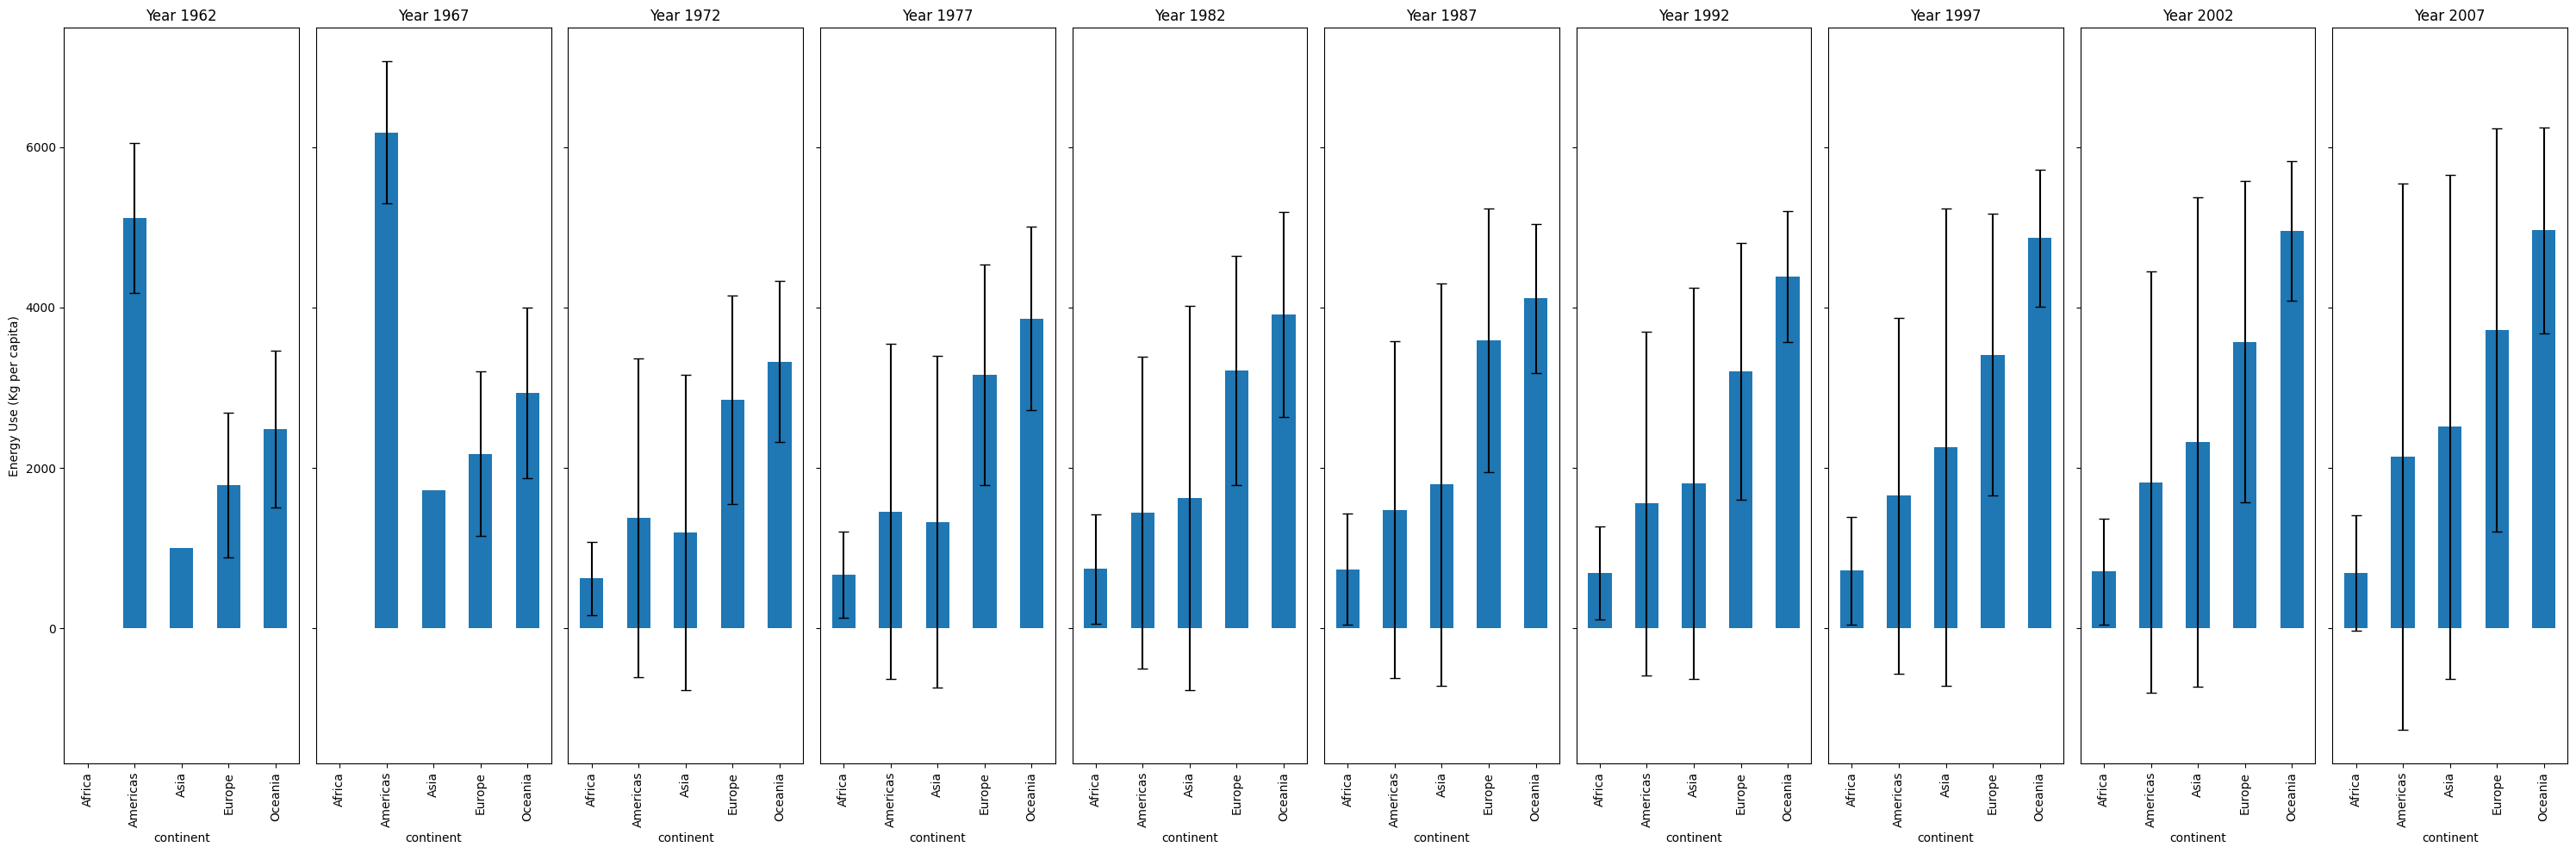

In [56]:
import matplotlib.pyplot as plt
# Group by Year and Continent, calculate mean and standard deviation of Energy use
grouped = df.groupby(['Year', 'continent'])['Energy use (kg of oil equivalent per capita)'].agg(['mean', 'std']).reset_index()

# Plotting separate histogram for each year
years = df['Year'].unique()
num_years = len(years)

fig, axs = plt.subplots(1, num_years, figsize=(30, 10), sharey=True)

for i, year in enumerate(years):
    year_data = grouped[grouped['Year'] == year]
    ax = axs[i]
    year_data.plot(kind='bar', x='continent', y='mean', yerr='std', ax=ax, capsize=4)
    ax.set_title(f'Year {year}')
    #ax.set_xlabel('Continent')
    ax.set_ylabel('Energy Use (Kg per capita)')
    ax.legend().remove()  # Remove legend to avoid overlap
    
plt.tight_layout()
plt.show()

<h4>2. Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)</h4>

In [2]:
#For this item, we will run a T-test between Europe and Asia for the years after 1990 and we will compare the Imports of goods and services
# First, we will filter our data set just to have the continent, country name, year and Imports of goods and services (% of GDP)

#Data filtering
data_imports=df[df['Year']> 1990]
data_imports = data_imports[(data_imports['continent'] == 'Asia') | (data_imports['continent'] == 'Europe')]
data_imports= data_imports.dropna(subset=['Imports of goods and services (% of GDP)', 'continent']) #Here we drop those rows that have no values for imports or continent
data_imports=data_imports[['Country Name','Year','Imports of goods and services (% of GDP)', 'continent']]

print(data_imports)

            Country Name  Year  Imports of goods and services (% of GDP)  \
8            Afghanistan  2002                                 65.287704   
9            Afghanistan  2007                                 58.350047   
16               Albania  1992                                 88.512248   
17               Albania  1997                                 34.189995   
18               Albania  2002                                 44.335366   
...                  ...   ...                                       ...   
2551             Vietnam  2002                                 57.249342   
2552             Vietnam  2007                                 84.087509   
2564  West Bank and Gaza  1997                                 73.041119   
2565  West Bank and Gaza  2002                                 62.815682   
2566  West Bank and Gaza  2007                                 77.810672   

     continent  
8         Asia  
9         Asia  
16      Europe  
17      Europe  
18

In [69]:
from scipy.stats import ttest_ind

# separating both data sets
imports_asia = data_imports[data_imports['continent'] == 'Asia']['Imports of goods and services (% of GDP)']
imports_europe = data_imports[data_imports['continent'] == 'Europe']['Imports of goods and services (% of GDP)']

# Perform t-test
t_statistic, p_value = ttest_ind(imports_asia, imports_europe)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 1.4185256887958868
P-value: 0.15751969325554196


<h5>We can see that the p-value is greater than 0.05 so we conclude that there is no significant evidence between imports of good and services between Asia and Europe after 1990. We will plot the distribution of Imports along with their means to see it graphically</h5>

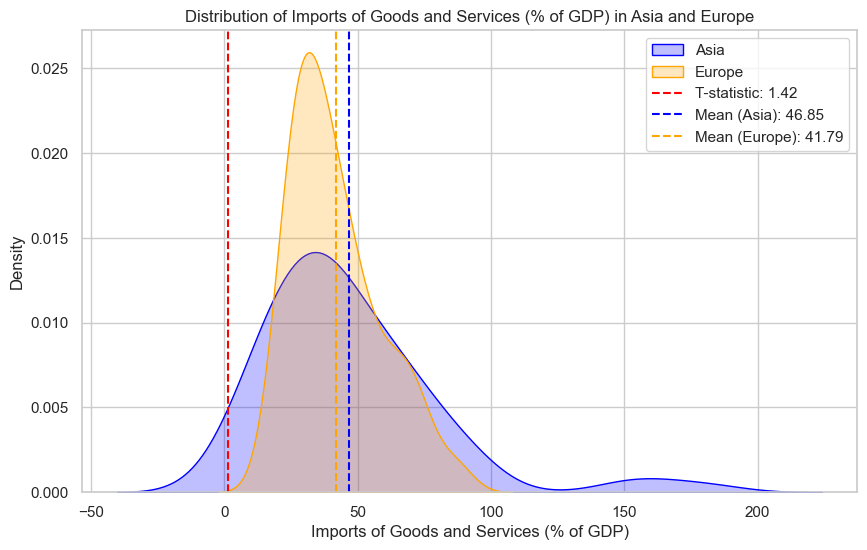

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
# Create a figure and axis
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

mean_asia = imports_asia.mean()
mean_europe = imports_europe.mean()

# Plot KDE for Asia
sns.kdeplot(imports_asia, color='blue', label='Asia', fill=True)

# Plot KDE for Europe
sns.kdeplot(imports_europe, color='orange', label='Europe', fill=True)

# Perform t-test
t_statistic, p_value = ttest_ind(imports_asia, imports_europe)

# Add a vertical line for the t-statistic
t_statistic_value = t_statistic
plt.axvline(t_statistic_value, color='red', linestyle='--', label=f'T-statistic: {t_statistic:.2f}')

plt.axvline(mean_asia, color='blue', linestyle='--', label=f'Mean (Asia): {mean_asia:.2f}')
plt.axvline(mean_europe, color='orange', linestyle='--', label=f'Mean (Europe): {mean_europe:.2f}')

# Add legend and labels
plt.title('Distribution of Imports of Goods and Services (% of GDP) in Asia and Europe after 1990')
plt.xlabel('Imports of Goods and Services (% of GDP)')
plt.ylabel('Density')
plt.legend()
plt.show()

<h3>3. What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)</h3>

In [5]:
#First, we start by cleaning the dataset and discard columns that we will not use


data_pop_dens= df.dropna(subset=['Population density (people per sq. km of land area)']) #Actually this line will not drop any row since all of them contain data 
data_pop_dens=df[['Country Name','Year','Population density (people per sq. km of land area)']]

print(len(df))
print((data_pop_dens))


2607
     Country Name  Year  Population density (people per sq. km of land area)
0     Afghanistan  1962                                          14.312061  
1     Afghanistan  1967                                          15.881812  
2     Afghanistan  1972                                          17.947027  
3     Afghanistan  1977                                          19.998926  
4     Afghanistan  1982                                          19.402324  
...           ...   ...                                                ...  
2602     Zimbabwe  1987                                          24.649495  
2603     Zimbabwe  1992                                          28.485762  
2604     Zimbabwe  1997                                          31.174507  
2605     Zimbabwe  2002                                          32.807111  
2606     Zimbabwe  2007                                          34.374559  

[2607 rows x 3 columns]


In [43]:
#For each year, we are going to get the top 5 countries with the highest population density per sq km and then we will elaborate a ranking of countries for all years

Results = pd.DataFrame(columns=['Year', 'Country Name', 'Population density (people per sq. km of land area)'])

#Creating a DF in order to graph the countries

for year in data_pop_dens['Year'].unique():

    df_year = data_pop_dens[data_pop_dens['Year'] == year]
    sorted_df = df_year.sort_values(by='Population density (people per sq. km of land area)', ascending=False)    

    top_five_countries_year = sorted_df.head(5)
    
    # Append the results to the new dataframe
    Results = pd.concat([Results,top_five_countries_year[['Year', 'Country Name', 'Population density (people per sq. km of land area)']]])


print(Results)


    

      Year          Country Name  \
1616  1962                Monaco   
1440  1962      Macao SAR, China   
1000  1962  Hong Kong SAR, China   
2070  1962             Singapore   
870   1962             Gibraltar   
1617  1967                Monaco   
1441  1967      Macao SAR, China   
1001  1967  Hong Kong SAR, China   
2071  1967             Singapore   
871   1967             Gibraltar   
1442  1972      Macao SAR, China   
1618  1972                Monaco   
1002  1972  Hong Kong SAR, China   
2072  1972             Singapore   
872   1972             Gibraltar   
1619  1977                Monaco   
1443  1977      Macao SAR, China   
1003  1977  Hong Kong SAR, China   
2073  1977             Singapore   
873   1977             Gibraltar   
1620  1982                Monaco   
1444  1982      Macao SAR, China   
1004  1982  Hong Kong SAR, China   
2074  1982             Singapore   
874   1982             Gibraltar   
1445  1987      Macao SAR, China   
1621  1987                Mo

C:\Users\bruno\AppData\Local\Temp\ipykernel_11768\2732648246.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Results = pd.concat([Results,top_five_countries_year[['Year', 'Country Name', 'Population density (people per sq. km of land area)']]])


In [42]:
from collections import Counter
#Getting the country with the highest Pop density across all years
top_countries = Results.groupby('Year')['Country Name'].first().tolist()

country_counts = Counter(top_countries)
max_count = max(country_counts.values())

# Find the countries with the maximum count of occurrences
most_common_countries = [country for country, count in country_counts.items() if count == max_count]

print(top_countries)
print(most_common_countries)
print(country_counts)

['Monaco', 'Monaco', 'Macao SAR, China', 'Monaco', 'Monaco', 'Macao SAR, China', 'Macao SAR, China', 'Macao SAR, China', 'Macao SAR, China', 'Monaco']
['Monaco', 'Macao SAR, China']
Counter({'Monaco': 5, 'Macao SAR, China': 5})


<h5> The countries with the highest population density across all years are Monaco and Macao SAR China with 5 appearances each. Let's check the graphs </hs>

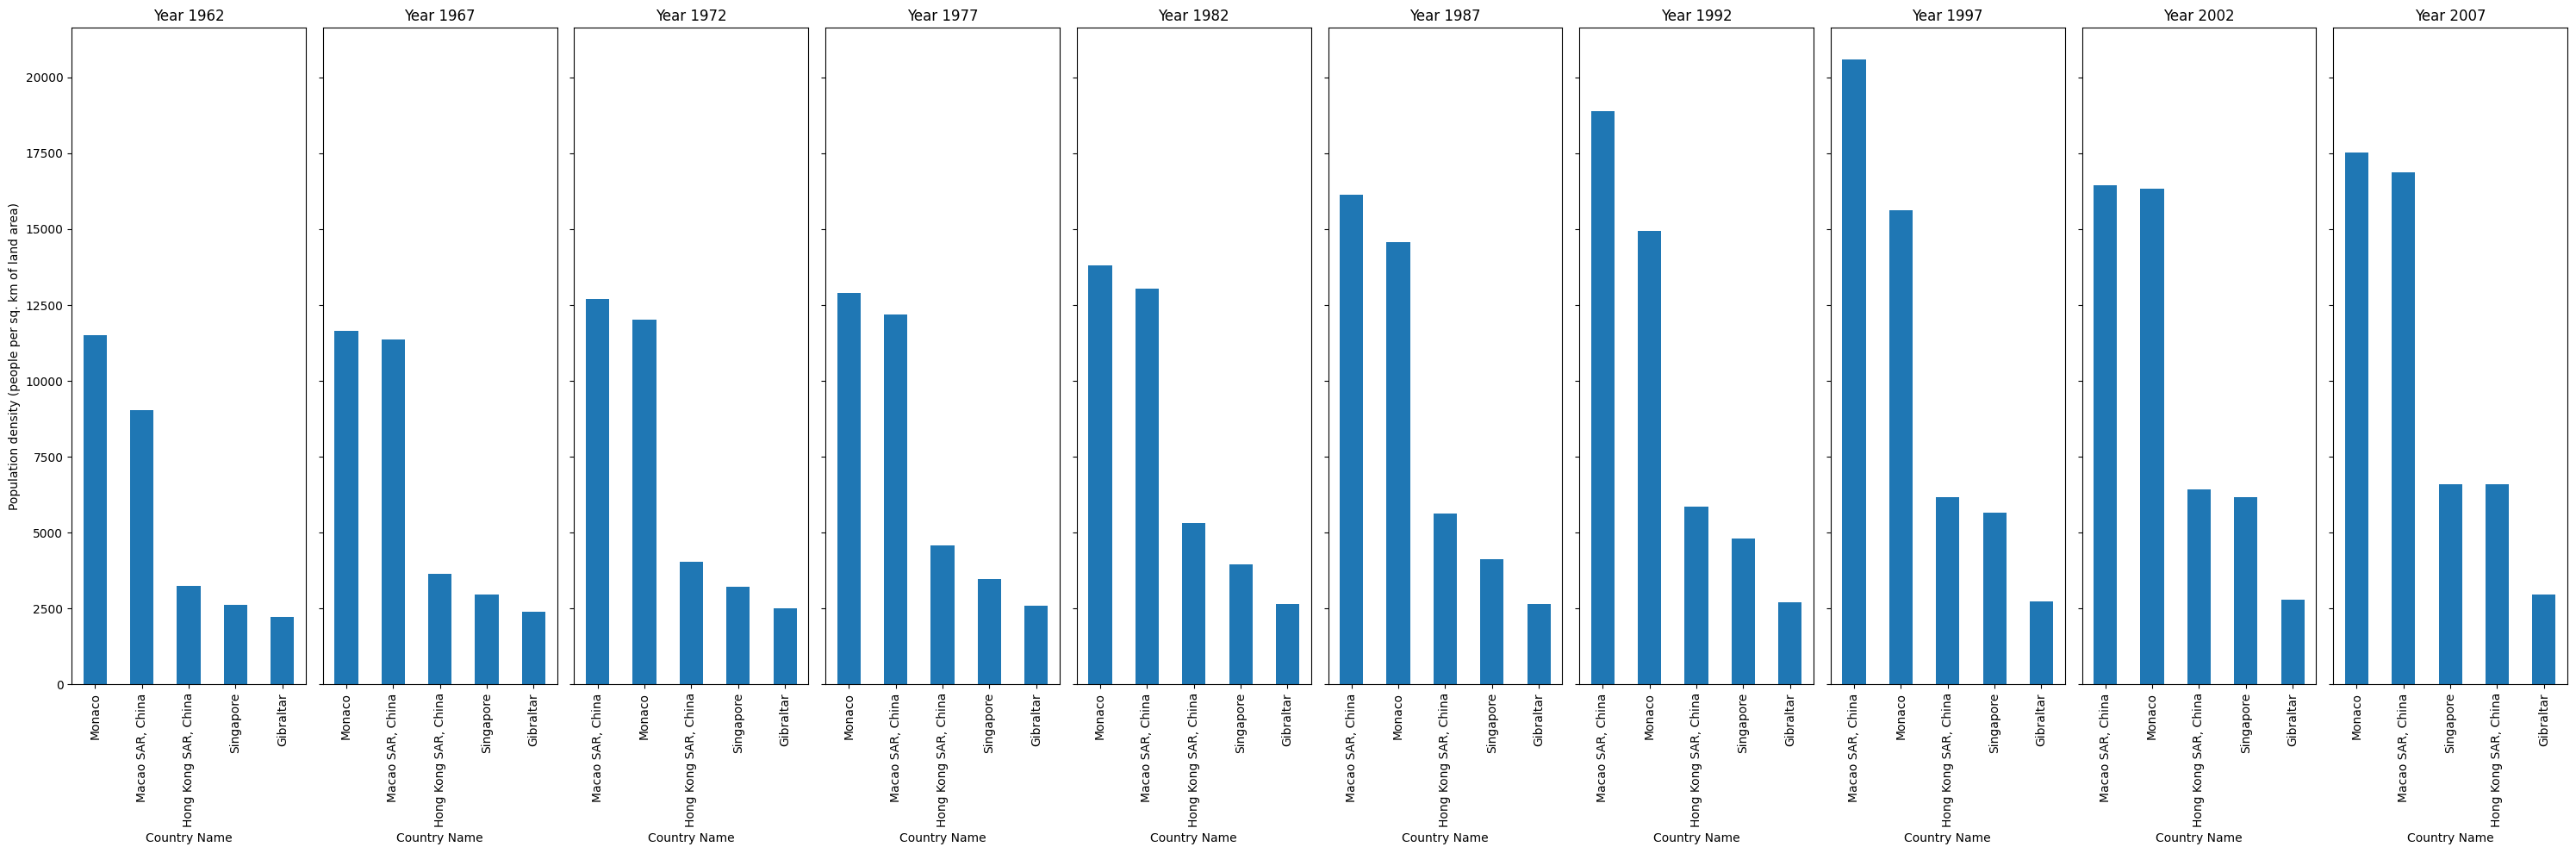

In [44]:
#Building 10 graphs (one per year) for the pop density top 5 countries
import matplotlib.pyplot as plt

years = Results['Year'].unique()
num_years = len(years)

fig, axs = plt.subplots(1, num_years, figsize=(30, 10), sharey=True)

for i, year in enumerate(years):
    year_data = Results[Results['Year'] == year]
    ax = axs[i]
    year_data.plot(kind='bar', x='Country Name', y='Population density (people per sq. km of land area)', ax=ax, capsize=4)
    ax.set_title(f'Year {year}')
    #ax.set_xlabel('Continent')
    ax.set_ylabel('Population density (people per sq. km of land area)')
    ax.legend().remove()  # Remove legend to avoid overlap
    
plt.tight_layout()
plt.show()

<h3>4. What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?</h3>

In [68]:
data_life_expectancy= df.dropna(subset=['Life expectancy at birth, total (years)', 'Year', 'Country Name'])

#Leaving only countries that have data for the 10 years
countries_to_filter=[]
for country in data_life_expectancy['Country Name'].unique():
    data_country= data_life_expectancy[data_life_expectancy['Country Name']== country]
    if ((data_country['Life expectancy at birth, total (years)'].count())!= 10):
        countries_to_filter.append(country)

filtered_life_expectancy = data_life_expectancy[~data_life_expectancy['Country Name'].isin(countries_to_filter)]
filtered_life_expectancy= filtered_life_expectancy[['Year', 'Country Name','Life expectancy at birth, total (years)','continent']]

print(f"{len(countries_to_filter)} countries were removed from the analysis because they did not contained data for Life Expectancy in the 10 years timepoints")


16 countries were removed from the analysis because they did not contained data for Life Expectancy in the 10 years timepoints


In [73]:

print(filtered_life_expectancy)

      Year Country Name  Life expectancy at birth, total (years) continent
0     1962  Afghanistan                                33.219902      Asia
1     1967  Afghanistan                                35.389415      Asia
2     1972  Afghanistan                                37.610146      Asia
3     1977  Afghanistan                                40.110146      Asia
4     1982  Afghanistan                                43.230732      Asia
...    ...          ...                                      ...       ...
2602  1987     Zimbabwe                                61.753805    Africa
2603  1992     Zimbabwe                                56.491976    Africa
2604  1997     Zimbabwe                                46.065902    Africa
2605  2002     Zimbabwe                                40.679146    Africa
2606  2007     Zimbabwe                                44.177756    Africa

[2360 rows x 4 columns]


In [84]:
# We will calculate de difference between each time point (in total 10 time points) for each country and then we will aggregate this values. 
# The countries with the highest values will be those who experienced the highest change in life expectancy between 1962 and 2007

data_life_exp_change=[]
for country in filtered_life_expectancy['Country Name'].unique():
    data_filter= filtered_life_expectancy[filtered_life_expectancy['Country Name']== country]
    change= ((data_filter['Life expectancy at birth, total (years)'].diff()).sum())
    data_life_exp_change.append((country,change))

final_data=pd.DataFrame(data_life_exp_change, columns=['Country Name', 'Change in life expectancy'])
final_data2 =final_data.sort_values(by='Change in life expectancy', ascending=False)


print(final_data2)
print(data_life_exp_change)


           Country Name  Change in life expectancy
136            Maldives                  36.916146
20               Bhutan                  33.198951
213         Timor-Leste                  31.085146
217             Tunisia                  30.860756
164                Oman                  30.823098
..                  ...                        ...
16              Belarus                   1.567585
180  Russian Federation                   0.476146
221             Ukraine                  -0.923902
123             Lesotho                  -2.520024
235            Zimbabwe                  -8.100146

[236 rows x 2 columns]
[('Afghanistan', 24.6139268293), ('Albania', 12.307439024399997), ('Algeria', 25.853365853699998), ('Angola', 15.648146341399993), ('Antigua and Barbuda', 12.204682926800004), ('Arab World', 21.1984053268), ('Argentina', 9.576439024400003), ('Armenia', 7.054804878099986), ('Aruba', 8.161219512200006), ('Australia', 10.350243902399995), ('Austria', 10.87097560979

In [49]:

filtered_life_expectancy= filtered_life_expectancy[filtered_life_expectancy['Year']==2007].sort_values(by='Life expectancy at birth, total (years)', ascending=False)

print(filtered_life_expectancy)

      Year              Country Name  Life expectancy at birth, total (years)
1179  2007                     Japan                                82.507073
1009  2007      Hong Kong SAR, China                                82.326829
2312  2007               Switzerland                                81.741463
1079  2007                   Iceland                                81.453659
1159  2007                     Italy                                81.434146
...    ...                       ...                                      ...
2292  2007                 Swaziland                                46.772390
399   2007  Central African Republic                                45.687390
2069  2007              Sierra Leone                                45.488366
1359  2007                   Lesotho                                44.882220
2606  2007                  Zimbabwe                                44.177756

[236 rows x 3 columns]


In [59]:
print('Those are the top 5 countries that shown the greatest increase in Life expectancy between 1962 and 2007 ')
print((final_data2[['Country Name','Change in life expectancy']]).head(5) )
print('\nThose are the top 5 countries that shown the lowest increase in Life expectancy between 1962 and 2007')
print((final_data2[['Country Name','Change in life expectancy']]).tail(5))
print('\nFinally, those are the top 5 countries with the highest life expectancy in 2007')
print((filtered_life_expectancy[['Country Name','Life expectancy at birth, total (years)']]).head(5))


Those are the top 5 countries that shown the greatest increase in Life expectancy between 1962 and 2007 
    Country Name  Change in life expectancy
136     Maldives                  36.916146
20        Bhutan                  33.198951
213  Timor-Leste                  31.085146
217      Tunisia                  30.860756
164         Oman                  30.823098

Those are the top 5 countries that shown the lowest increase in Life expectancy between 1962 and 2007
           Country Name  Change in life expectancy
16              Belarus                   1.567585
180  Russian Federation                   0.476146
221             Ukraine                  -0.923902
123             Lesotho                  -2.520024
235            Zimbabwe                  -8.100146

Finally, those are the top 5 countries with the highest life expectancy in 2007
              Country Name  Life expectancy at birth, total (years)
1179                 Japan                                82.507073
1009 

In [97]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show,output_notebook
from bokeh.sampledata.sprint import sprint
from bokeh.transform import linear_cmap
from bokeh.palettes import Reds, Greens

output_notebook()

data= pd.concat([final_data2.head(5), final_data2.tail(5)])
source = ColumnDataSource(data=)
colors = data['Change in life expectancy']

p = figure(y_range=data['Country Name'], tools="hover", width=1000, height=400, title="Top 5 countries with thie highest and lowest increase in life expectancy between 1962 and 2007")
p.hbar(y='Country Name', right='Change in life expectancy', height=0.3, source=source ,fill_color=colors)

p.ygrid.grid_line_color = None
p.xaxis.axis_label = "Increase in life expectancy (year)"
p.outline_line_color = None

show(p)

Loading BokehJS ...

RuntimeError: 

Expected fill_color to reference fields in the supplied data source.

When a 'source' argument is passed to a glyph method, values that are sequences
(like lists or arrays) must come from references to data columns in the source.

For instance, as an example:

    source = ColumnDataSource(data=dict(x=a_list, y=an_array))

    p.circle(x='x', y='y', source=source, ...) # pass column names and a source

Alternatively, *all* data sequences may be provided as literals as long as a
source is *not* provided:

    p.circle(x=a_list, y=an_array, ...)  # pass actual sequences and no source

